In [2]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124
     ---------------------------------------- 0.0/5.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.9 MB ? eta -:--:--
     - -------------------------------------- 0.3/5.9 MB ? eta -:--:--
     --- ------------------------------------ 0.5/5.9 MB 1.0 MB/s eta 0:00:06
     ----- ---------------------------------- 0.8/5.9 MB 1.2 MB/s eta 0:00:05
     ------- -------------------------------- 1.0/5.9 MB 1.2 MB/s eta 0:00:05
     -------- ------------------------------- 1.3/5.9 MB 1.2 MB/s eta 0:00:04
     ---------- ----------------------------- 1.6/5.9 MB 1.2 MB/s eta 0:00:04
     ------------ --------------------------- 1.8/5.9 MB 1.2 MB/s eta 0:00:04
     ------------ --------------------------- 1.8/5.9 MB 1.2 MB/s eta 0:00:04
     -------------- ------------------------- 2.1/5.9 MB 1.1 MB/s eta 0:00:04
     -------------- -------------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\envs\Liver_Segmentation\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\LENOVO\anaconda3\envs\Liver_Segmentation\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\LENOVO\anaconda3\envs\Liver_Segmentation\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in _fp_read
    data = self._fp.read(chunk_amt)
  File "C:\Users\LENOVO\anaconda3\envs\Liver_Segmentation\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
  File "C:\Users\LENOVO\anaconda3\envs\Liver_Segmentation\lib\http\client.py", line 459, in read
    n = self.readinto(b)
  File "C:\Users\LENOVO\anaconda3\envs\Liver_Segmentation\lib\http\client.py", line 503, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\LENOVO


     ---------------------------------------- 0.0/2.5 GB 506.6 kB/s eta 1:22:05
     ---------------------------------------- 0.0/2.5 GB 488.2 kB/s eta 1:25:10
     ---------------------------------------- 0.0/2.5 GB 488.2 kB/s eta 1:25:10
     ---------------------------------------- 0.0/2.5 GB 494.4 kB/s eta 1:24:05
     ---------------------------------------- 0.0/2.5 GB 499.2 kB/s eta 1:23:17
     ---------------------------------------- 0.0/2.5 GB 499.2 kB/s eta 1:23:17
     ---------------------------------------- 0.0/2.5 GB 501.6 kB/s eta 1:22:52
     ---------------------------------------- 0.0/2.5 GB 501.6 kB/s eta 1:22:52
     ---------------------------------------- 0.0/2.5 GB 503.3 kB/s eta 1:22:34
     ---------------------------------------- 0.0/2.5 GB 503.3 kB/s eta 1:22:34
     ---------------------------------------- 0.0/2.5 GB 503.3 kB/s eta 1:22:34
     ---------------------------------------- 0.0/2.5 GB 503.3 kB/s eta 1:22:34
     ----------------------------------

In [4]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.5 MB 1.3 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/7.5 MB 1.4 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/7.5 MB 1.5 MB/s eta 0:00:05
   -------- ------------------------------- 1.6/7.5 MB 1.5 MB/s eta 0:00:05
   ----------- ---------------------------- 2.1/7.5 MB 1.5 MB/s eta 0:00:04
   ------------ --------------------------- 2.4/7.5 MB 1.5 MB/s eta 0:00:04
   --------------- ------------------------ 2.9/7.5 MB 1.6 MB/s eta 0:00:03
   ---------------- ----------------------- 3.1/7.5 MB 1.6 MB/s eta 0:00:03
   ------------------- -------------------- 3.7/7.5 MB 1.7 MB/s eta 0:00:03
   -------------------- ------------------- 3

In [6]:
!pip install tqdm

In [1]:
import monai
import matplotlib.pyplot as plt

In [2]:
import os
from glob import glob
import shutil
from tqdm import tqdm
import dicom2nifti
import numpy as np
import nibabel as nib
from monai.transforms import (
    Compose,
    EnsureChannelFirstD,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,

)
from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import set_determinism


def prepare(in_dir, pixdim=(1.5, 1.5, 1.0), a_min=-200, a_max=200, spatial_size=[128, 128, 86], cache=True):
    """
    This function is for preprocessing, it contains only the basic transforms, but you can add more operations that you
    find in the Monai documentation.
    https://monai.io/docs.html
    """

    set_determinism(seed=0)

    path_train_volumes = sorted(glob(os.path.join(in_dir, "TrainVolumes", "*.nii.gz")))
    path_train_segmentation = sorted(glob(os.path.join(in_dir, "TrainSegmentation", "*.nii.gz")))

    path_test_volumes = sorted(glob(os.path.join(in_dir, "TestVolumes", "*.nii.gz")))
    path_test_segmentation = sorted(glob(os.path.join(in_dir, "TestSegmentation", "*.nii.gz")))

    train_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in
                   zip(path_train_volumes, path_train_segmentation)]
    test_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in
                  zip(path_test_volumes, path_test_segmentation)]

    train_transforms = Compose(#allow to apply multiple transforms same time
        [
            LoadImaged(keys=["vol", "seg"]),
            EnsureChannelFirstD(keys=["vol", "seg"]),
            Spacingd(keys=["vol", "seg"], pixdim=pixdim, mode=("bilinear", "nearest")),
            Orientationd(keys=["vol", "seg"], axcodes="RAS"),
            ScaleIntensityRanged(keys=["vol"], a_min=a_min, a_max=a_max, b_min=0.0, b_max=1.0, clip=True),
            CropForegroundd(keys=["vol", "seg"], source_key="vol"),
            Resized(keys=["vol", "seg"], spatial_size=spatial_size),
            ToTensord(keys=["vol", "seg"]),

        ]
    )

    test_transforms = Compose(
        [#functions from monai(not all. only few)
            LoadImaged(keys=["vol", "seg"]),
            EnsureChannelFirstD(keys=["vol", "seg"]),
            Spacingd(keys=["vol", "seg"], pixdim=pixdim, mode=("bilinear", "nearest")),
            Orientationd(keys=["vol", "seg"], axcodes="RAS"),
            ScaleIntensityRanged(keys=["vol"], a_min=a_min, a_max=a_max, b_min=0.0, b_max=1.0, clip=True),
            CropForegroundd(keys=['vol', 'seg'], source_key='vol'),
            Resized(keys=["vol", "seg"], spatial_size=spatial_size),
            ToTensord(keys=["vol", "seg"]),

        ]
    )

    if cache:
        train_ds = CacheDataset(data=train_files, transform=train_transforms, cache_rate=1.0)
        train_loader = DataLoader(train_ds, batch_size=1)

        test_ds = CacheDataset(data=test_files, transform=test_transforms, cache_rate=1.0)
        test_loader = DataLoader(test_ds, batch_size=1)

        return train_loader, test_loader

    else:
        train_ds = Dataset(data=train_files, transform=train_transforms)
        train_loader = DataLoader(train_ds, batch_size=1)

        test_ds = Dataset(data=test_files, transform=test_transforms)
        test_loader = DataLoader(test_ds, batch_size=1)

        return train_loader, test_loader

In [5]:
from monai.utils import first
import matplotlib.pyplot as plt
import torch
import os
import numpy as np
from monai.losses import DiceLoss
from tqdm import tqdm

def show_patient(data, SLICE_NUMBER=1, train=True, test=False):
    """
    This function is to show one patient from your datasets, so that you can si if the it is okay or you need 
    to change/delete something.

    `data`: this parameter should take the patients from the data loader, which means you need to can the function
    prepare first and apply the transforms that you want after that pass it to this function so that you visualize 
    the patient with the transforms that you want.
    `SLICE_NUMBER`: this parameter will take the slice number that you want to display/show
    `train`: this parameter is to say that you want to display a patient from the training data (by default it is true)
    `test`: this parameter is to say that you want to display a patient from the testing patients.
    """

    check_patient_train, check_patient_test = data

    view_train_patient = first(check_patient_train)
    view_test_patient = first(check_patient_test)#function from monai which take first few patients

    
    if train:
        plt.figure("Visualization Train", (12, 6))
        plt.subplot(1, 2, 1)
        plt.title(f"vol {SLICE_NUMBER}")
        plt.imshow(view_train_patient["vol"][0, 0, :, :, SLICE_NUMBER], cmap="gray")

        plt.subplot(1, 2, 2)
        plt.title(f"seg {SLICE_NUMBER}")
        plt.imshow(view_train_patient["seg"][0, 0, :, :, SLICE_NUMBER])
        plt.show()
    
    if test:
        plt.figure("Visualization Test", (12, 6))
        plt.subplot(1, 2, 1)
        plt.title(f"vol {SLICE_NUMBER}")
        plt.imshow(view_test_patient["vol"][0, 0, :, :, SLICE_NUMBER], cmap="gray")

        plt.subplot(1, 2, 2)
        plt.title(f"seg {SLICE_NUMBER}")
        plt.imshow(view_test_patient["seg"][0, 0, :, :, SLICE_NUMBER])
        plt.show()

In [4]:
in_dir=r'E:\Medical imaging\Liver segmentation\final data set'
patient=prepare(in_dir)
show_patient(patient,40)

C:\Users\LENOVO\anaconda3\envs\Liver_Segmentation\lib\site-packages\monai\utils\deprecate_utils.py:321: FutureWarning: monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version 1.5.
  warn_deprecated(argname, msg, warning_category)
Loading dataset: 100%|██████████| 48/48 [08:14<00:00, 10.30s/it]


NameError: name 'first' is not defined

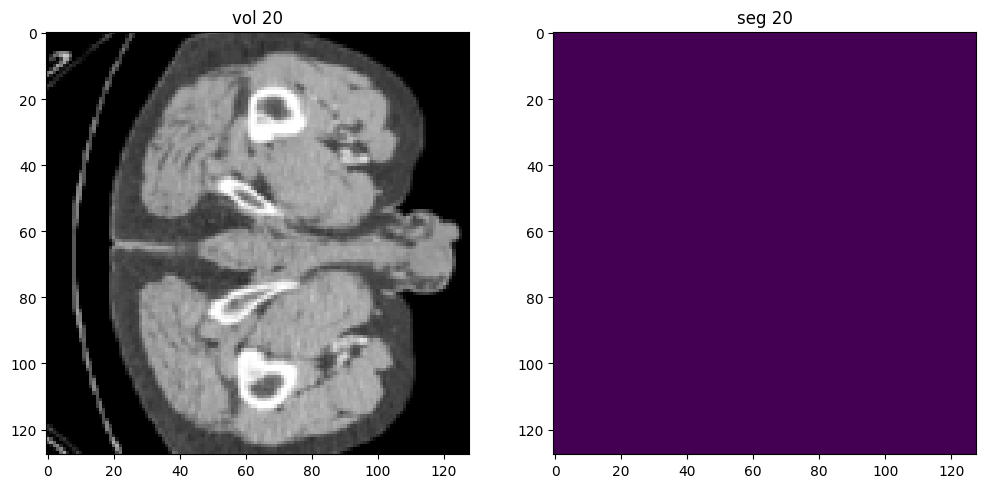

In [7]:
show_patient(patient,20)